In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [3]:
#Loading data set file in to data frame.
file_path = r'C:\Users\a913779\OneDrive - Eviden\Desktop\Lending Club Case Study\loan.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#to check no of rows and columns in the csv files
data.shape

(39717, 111)

In [5]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.59
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [6]:
#Removing columns which has more than 30% null values in it.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)
data.shape

(39717, 53)

In [7]:
#Now let us check how many unique values are present
column_unique = data.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [8]:
#From above dataset result, we can see there are single unique values also, which will not serve any purpose in our analysis
#Hence we can remove them as well
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [9]:
#above are the columns that can be removed
data.drop(columns = list(c1.index), inplace=True)
data.shape

(39717, 44)

In [10]:
#so now we have 44 columns
#Out of these let us discuss on few columns like
#url - different for each application, will not give any perfect result, so can be removed
#zip code - is not complete data - so we cannot analyze on the basis of this column, so can be removed 
#id, member_id have all unique values, hence remove them
del_cols = ["id","member_id","url","zip_code"]
data.drop(columns=del_cols, inplace=True)
data.shape

(39717, 40)

total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are best used for borrowers information which we do not need, as we are only interested in loan application details, so these columns can be removed. recoveries, collection_recovery_fee columns are only valid for charged off loans. so even these can be removed

In [11]:
del_cols = ["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
data.drop(columns=del_cols, inplace=True)
data.shape

(39717, 28)

In [12]:
#emp_title, and title columns have text values which are more unique values.
data.drop(['emp_title', 'title'], axis=1, inplace=True)
data.shape

(39717, 26)

In [13]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

From the above columns, let's analyze "Term" column

In [14]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [15]:
#There is empty space at the start of values. Let's remove it using strip function
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [16]:
# Let's now take loan_status
#Since loan status = "Current" means the users are still in the process of repaying the loan
#this data, hence,doesnt give serve any purpose for our analysis in approving or rejecting application, 
#so dropping this data makes sense
data = data[~(data['loan_status'] == 'Current')]
data.shape

(38577, 26)

In [17]:
#For remaining columns
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)

revol_bal           21275
installment         15022
funded_amnt_inv      8050
annual_inc           5215
dti                  2853
revol_util           1088
funded_amnt          1019
loan_amnt             870
earliest_cr_line      524
int_rate              370
total_acc              82
issue_d                55
dtype: int64

In [18]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.68
revol_util             0.13
pub_rec_bankruptcies   1.81
dtype: float64

In [19]:
#Removing the the null valued rows in the above columns.
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [20]:
data.shape

(36800, 26)

In [21]:
#Checking for missing values if any
(data.isna().sum()/len(data.index))*100

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.00
total_acc              0.00
pub_rec_bankruptcies   0.00
dtype: float64

The above data shows there are no more missing or Null values in the data set

In [22]:
#Let us now check the datatypes
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [23]:
#int_rate and revol_util are having '%' symbol values and having data type of object. 
#Let's remove % at the end and convert to float
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

In [24]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

From above list, we have issue_d and earliest_cr_line which are of "Object" datatype where as the values stored are "dates". Let us now convert these to date datatypes and derive few new columns from these

In [25]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [26]:
# Let's create new columns
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [27]:
#Corrected data types
data.dtypes

loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_bal                          int64
revol_util                       float64
total_acc       

In [28]:
# Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,2011,Dec,3,1985,Jan,99.50
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,2011,Dec,3,1999,Apr,100.00
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,2011,Dec,3,2001,Nov,100.00
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,2011,Dec,3,1996,Feb,100.00
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,2011,Dec,3,2004,Nov,100.00


In [29]:
data.shape

(36800, 32)

Let us now check for some outliers

In [30]:
#Starting with int_rate
data['int_rate'].head()

0   10.65
1   15.27
2   15.96
3   13.49
5    7.90
Name: int_rate, dtype: float64

In [31]:
data['int_rate'].describe()

count   36800.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

<Axes: >

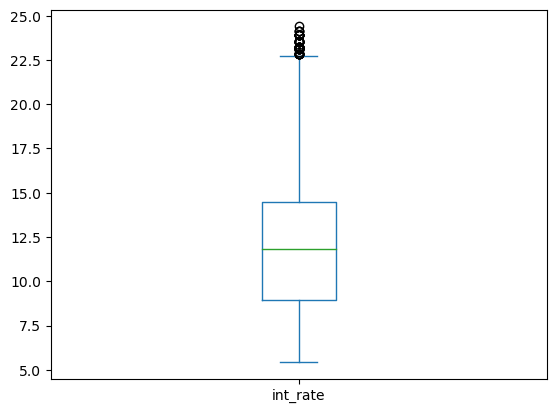

In [32]:
data['int_rate'].plot.box()

we can see some outlier values in int_rate column, which needs to be removed

In [33]:
quantile_info = data.int_rate.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50   11.83
0.75   14.46
0.90   16.82
0.95   18.39
0.97   19.36
0.98   20.11
0.99   20.99
Name: int_rate, dtype: float64

In [34]:
per_95_annual_inc = data['int_rate'].quantile(0.95)
data = data[data.int_rate <= per_95_annual_inc]

<Axes: >

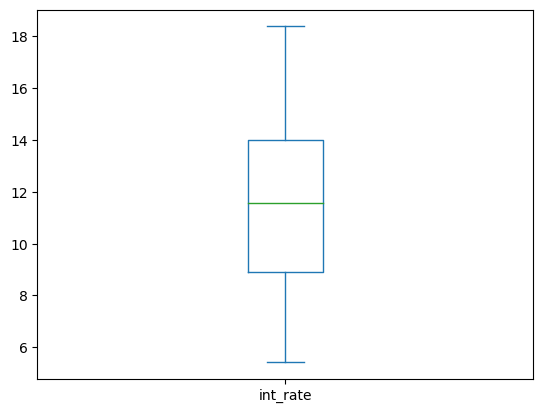

In [35]:
data['int_rate'].plot.box()

### Now the "int_rate" data looks good.

In [36]:
data.shape

(35042, 32)

In [37]:
#loan_amnt
data['loan_amnt'].head()

0     5000
1     2500
2     2400
3    10000
5     5000
Name: loan_amnt, dtype: int64

In [38]:
data['loan_amnt'].describe()

count   35042.00
mean    10746.86
std      7024.85
min       500.00
25%      5175.00
50%      9500.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<Axes: >

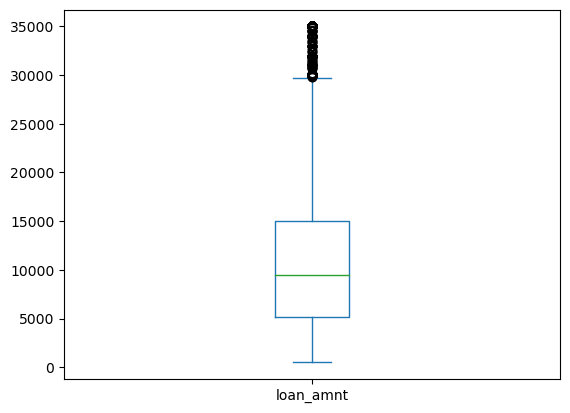

In [39]:
data['loan_amnt'].plot.box()

we can see some outlier values in loan_amnt column which needs to be removed

In [40]:
quantile_info = data.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    9500.00
0.75   15000.00
0.90   20000.00
0.95   25000.00
0.97   25000.00
0.98   30000.00
0.99   35000.00
Name: loan_amnt, dtype: float64

In [41]:
per_95_annual_inc = data['loan_amnt'].quantile(0.95)
data = data[data.loan_amnt <= per_95_annual_inc]

<Axes: >

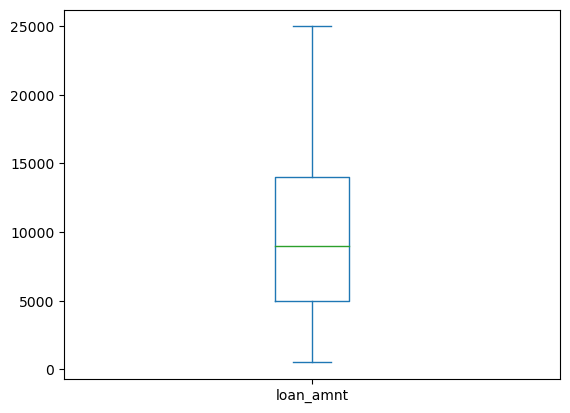

In [42]:
data['loan_amnt'].plot.box()

### Now the "loan_amnt" data looks good.

In [43]:
data.shape

(34042, 32)

In [44]:
#funded_amnt
data['funded_amnt'].head()

0     5000
1     2500
2     2400
3    10000
5     5000
Name: funded_amnt, dtype: int64

In [45]:
data['funded_amnt'].describe()

count   34042.00
mean     9914.37
std      5906.53
min       500.00
25%      5000.00
50%      9000.00
75%     13800.00
max     25000.00
Name: funded_amnt, dtype: float64

<Axes: >

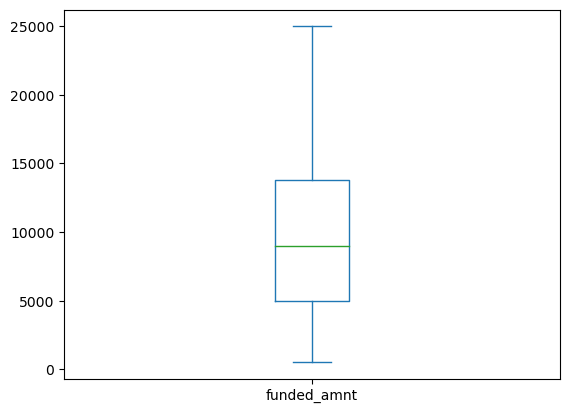

In [46]:
data['funded_amnt'].plot.box()

There are no outlier values in funded_amnt column so we are good to proceed.

In [47]:
#annual_inc
data['annual_inc'].head()

0   24000.00
1   30000.00
2   12252.00
3   49200.00
5   36000.00
Name: annual_inc, dtype: float64

In [48]:
data['annual_inc'].describe()

count     34042.00
mean      67115.43
std       63181.93
min        4000.00
25%       40000.00
50%       57398.00
75%       80000.00
max     6000000.00
Name: annual_inc, dtype: float64

<Axes: >

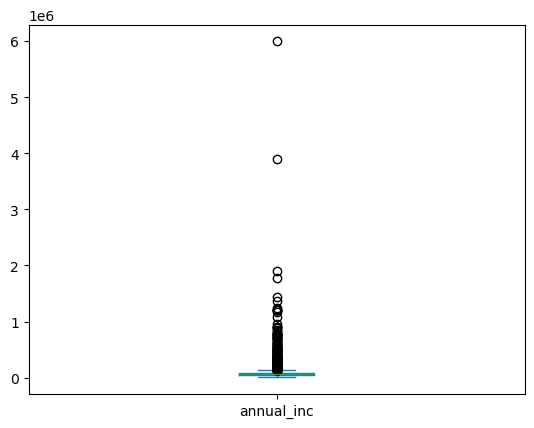

In [49]:
data['annual_inc'].plot.box()

we can see some outlier values in annual_inc column which needs to be removed

In [50]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    57398.00
0.75    80000.00
0.90   110000.00
0.95   135000.00
0.97   156000.00
0.98   176111.28
0.99   210000.00
Name: annual_inc, dtype: float64

In [51]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

<Axes: >

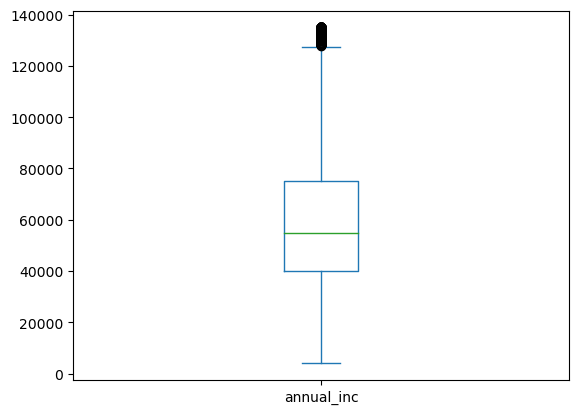

In [52]:
data['annual_inc'].plot.box()

Most of the outliers are removed, this is good to proceed further

In [53]:
data.shape

(32353, 32)

From the above dataset obtained, we can see that there are no unused or unnecessary columns. There are no invalid rows (like values containing blank, NaN, NULL etc.) There are no missing values The data types are all correct Format is standardized as all the float values are rounded to 2 decimals Date format is same for all the date columns Derived columns are generated as per the requirement and outlier treatment is also done

Hence, this data set can be now used for Univariate and Bivariate analysis By this, we can provide proper solution to the business

In [54]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,2011,Dec,3,1985,Jan,99.50
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,2011,Dec,3,1999,Apr,100.00
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,2011,Dec,3,2001,Nov,100.00
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,2011,Dec,3,1996,Feb,100.00
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,2011,Dec,3,2004,Nov,100.00


# Univariate Analysis

### Term

Text(0.5, 1.0, 'Term Distribution')

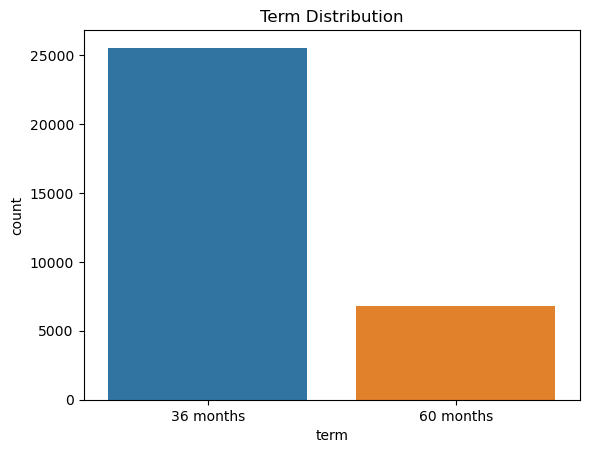

In [57]:
sns.countplot(x = 'term', data = data)
plt.title('Term'+' Distribution')

Observation: Borrowers has taken loan for 36 months tenure more than 60 months.

### Grade

Text(0.5, 1.0, 'Grade Distribution')

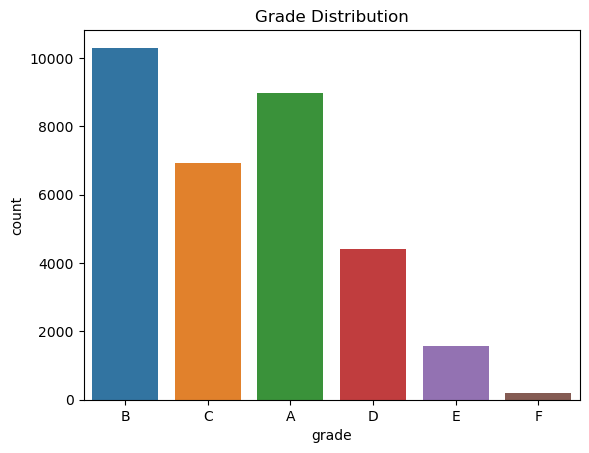

In [58]:
sns.countplot(x = 'grade', data = data)
plt.title('Grade'+' Distribution')

Observation: Most borrowers fall under A and B grades

### Sub_grade

In [64]:
#As we already have grade column to analyze, we can extract only int level value from the sub_grade variable

data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

Text(0.5, 1.0, 'Sub_Grade Distribution')

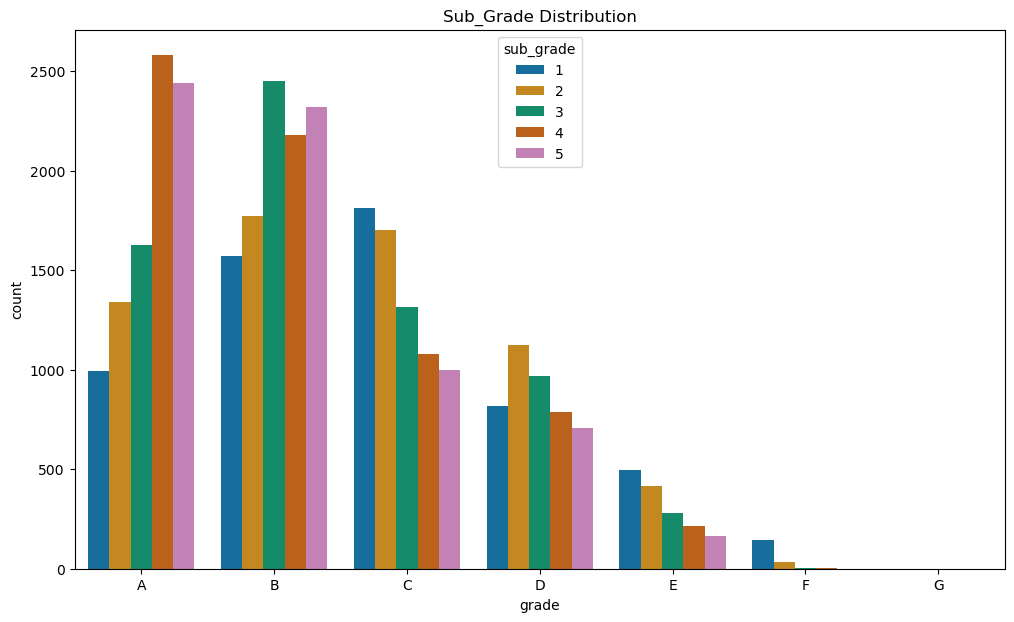

In [65]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data)
plt.title('Sub_Grade'+' Distribution')

### Employee Length

Text(0.5, 1.0, 'Emp_Length Distribution')

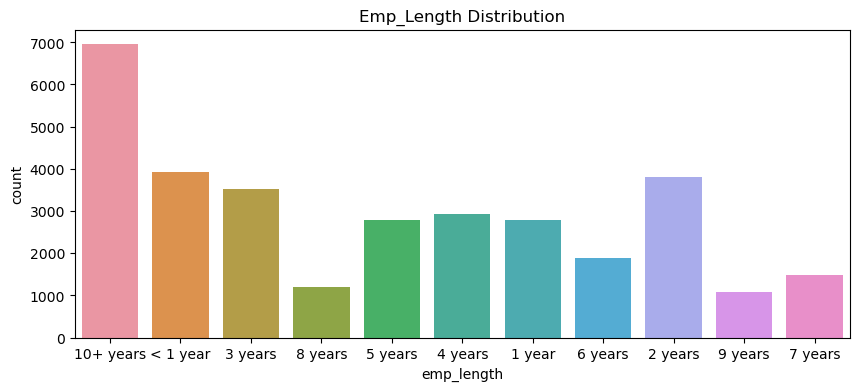

In [76]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'emp_length', data = data)
plt.title('Emp_Length'+' Distribution')

Observation: Borrowers are mostly 10+ years of employment length.

### Home ownership

Text(0.5, 1.0, 'Home_Ownership Distribution')

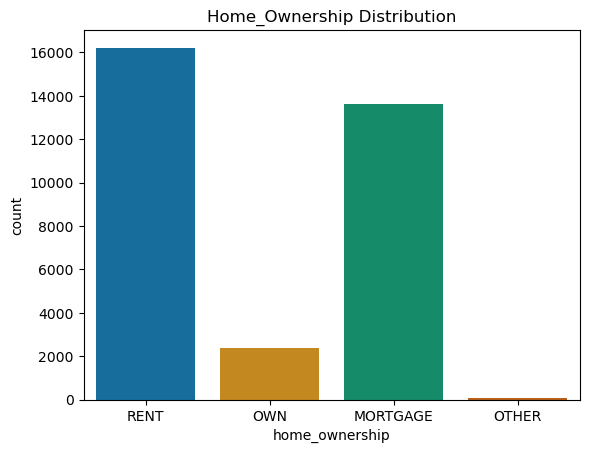

In [77]:
sns.countplot(x = 'home_ownership', data = data)
plt.title('Home_Ownership'+' Distribution')

Observations: The loan borrowers are mostly having rented or mortgage houses.

### Verification Status:

Text(0.5, 1.0, 'Verification_Status Distribution')

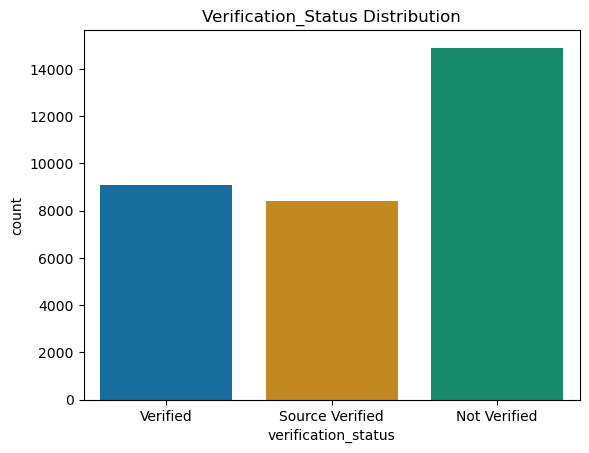

In [78]:
sns.countplot(x = 'verification_status', data = data)
plt.title('Verification_Status'+' Distribution')

Observation: Most of the loans were given to the borrowers without verification.

### Loan Status:

Text(0.5, 1.0, 'Loan_Status Distribution')

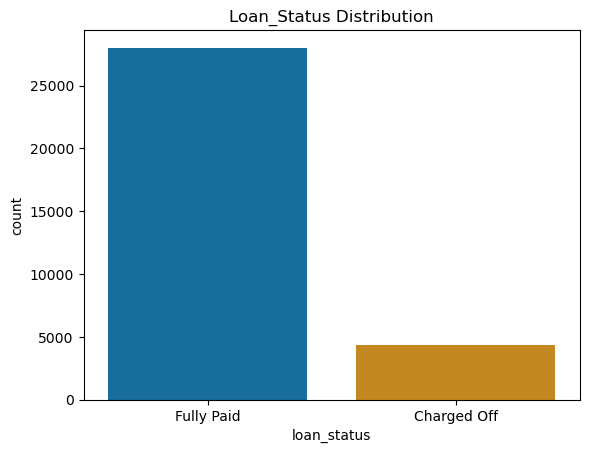

In [79]:
sns.countplot(x = 'loan_status', data = data)
plt.title('Loan_Status'+' Distribution')

Observation: The defaulters or charged off applicants are less than the ones who fully paid the loan

### Purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

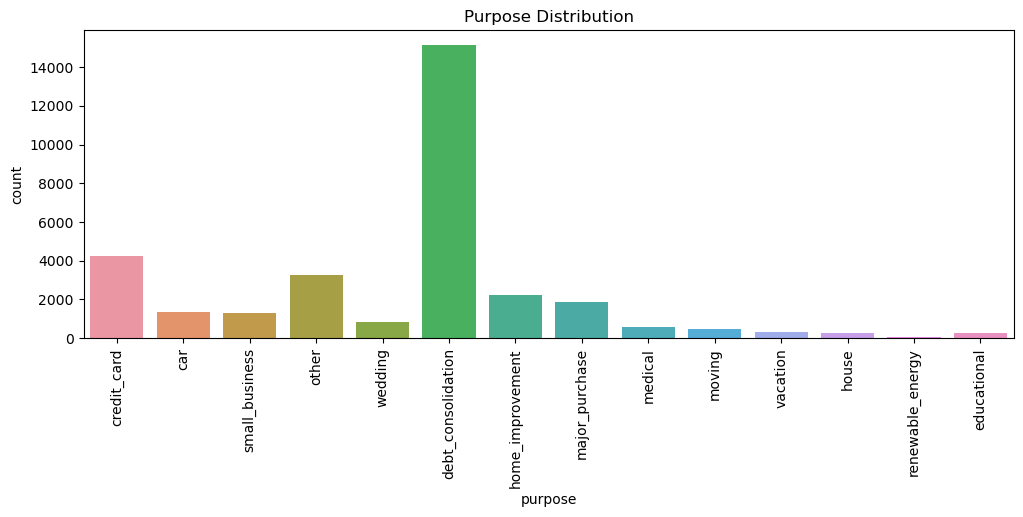

In [85]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'purpose', data = data)
plt.title('Purpose'+' Distribution')
plt.xticks(rotation=90)

Observation: Most of the applicants took loan for debt consolidation.

### Address State:

Text(0.5, 1.0, 'Address_State Distribution')

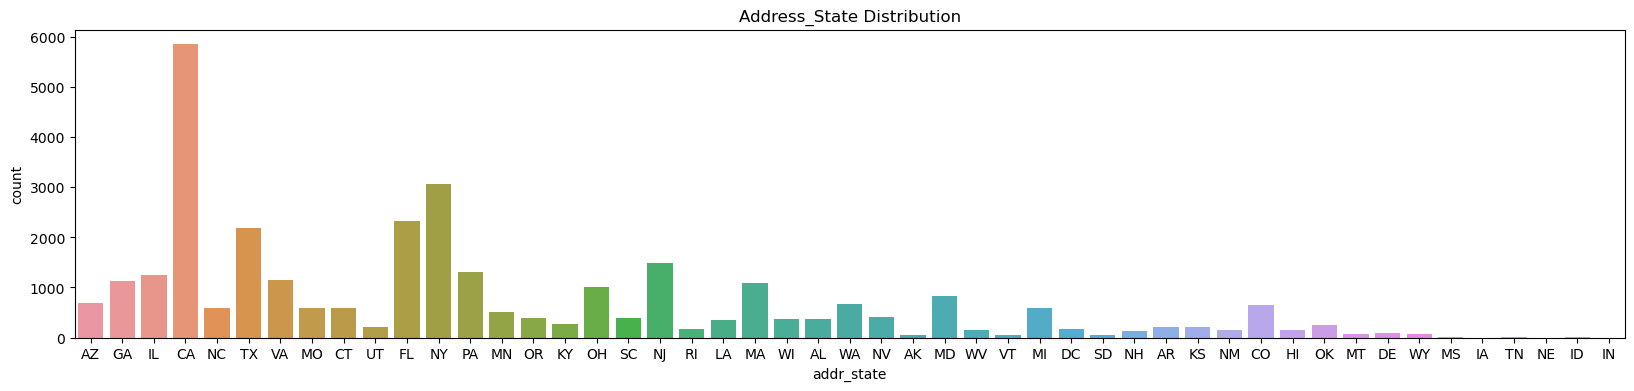

In [87]:
plt.figure(figsize=(20,4))
sns.countplot(x = 'addr_state', data = data)
plt.title('Address_State'+' Distribution')
#plt.xticks(rotation=90)

Observation: Most of the borrowers are from CA, NY and FL states

### Let us now analyze few numerical columns individually

### Loan Amount

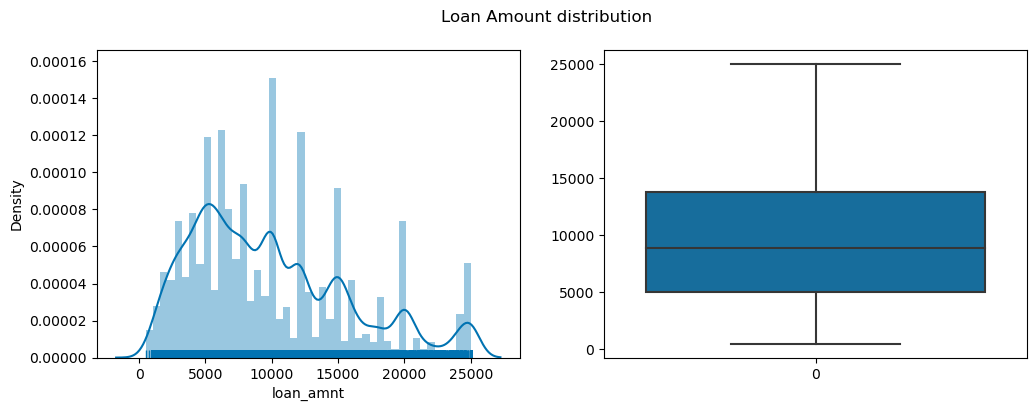

In [94]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [92]:
#loan amount in percentiles
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   32353.00
mean     9886.48
std      5952.72
min       500.00
5%       2200.00
10%      3000.00
25%      5000.00
50%      8875.00
75%     13800.00
90%     19750.00
95%     22000.00
99%     25000.00
max     25000.00
Name: loan_amnt, dtype: float64

Observation:
From the above plots, more number of people took loan amount of 10000, and also mean of distribution is almost 10000. And very few people took more than 30000 loan amount.

### Funded Amount

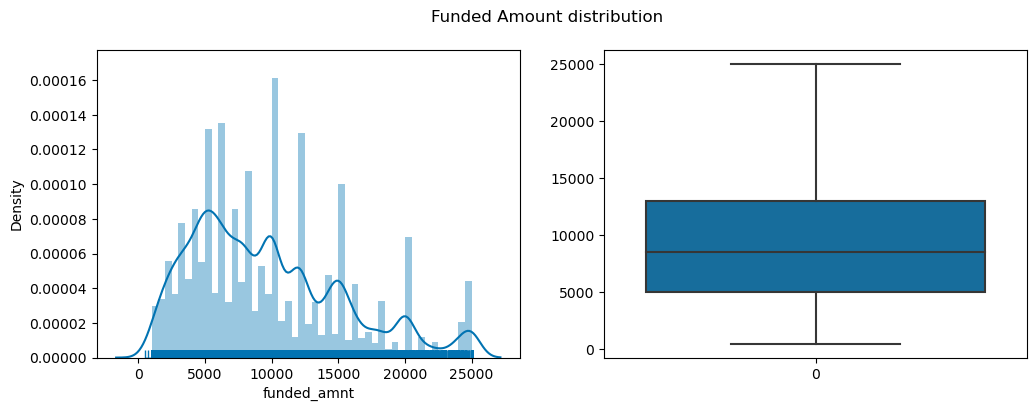

In [95]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.funded_amnt)
#Single title for both subplots.
plt.suptitle('Funded Amount distribution')
plt.show()

Observation: Funded amount is similar to loan Amount, hence, no of loans applied where all funded also.

Let us prove the above observation with approved loan ratio

### Approved Loan Amount Ratio

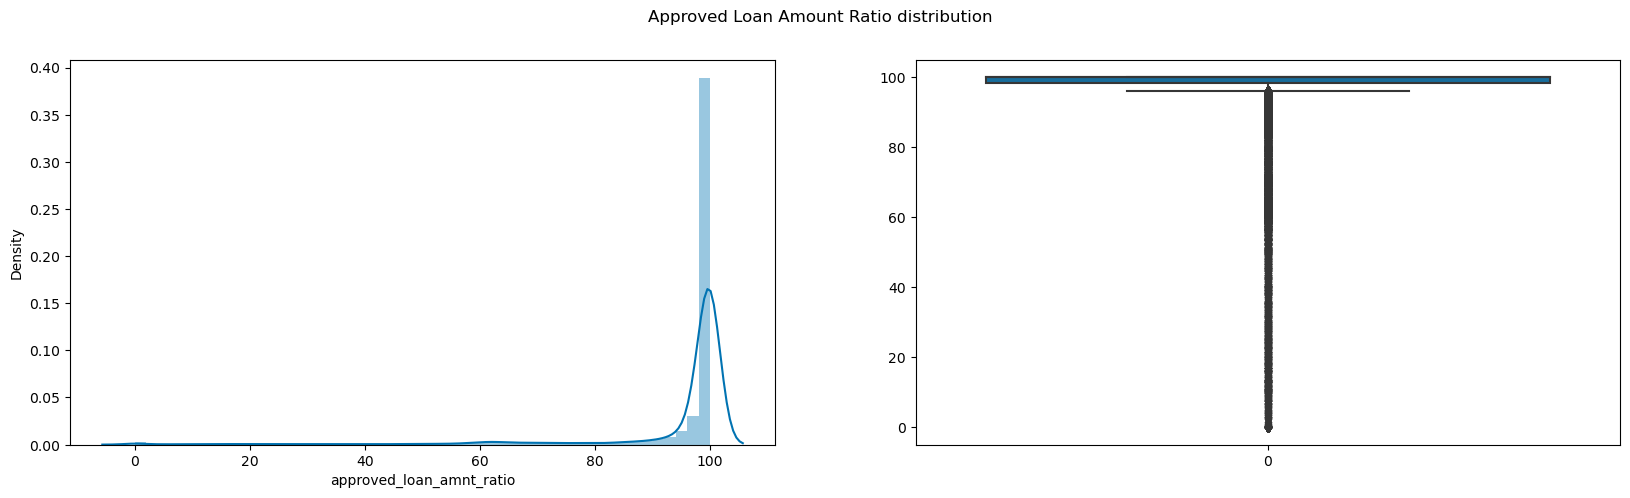

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

Observation: 70% of Borrowers got 100% loan amount from investors, which means, almost all the loans were funded by the investors

### Interest Rate

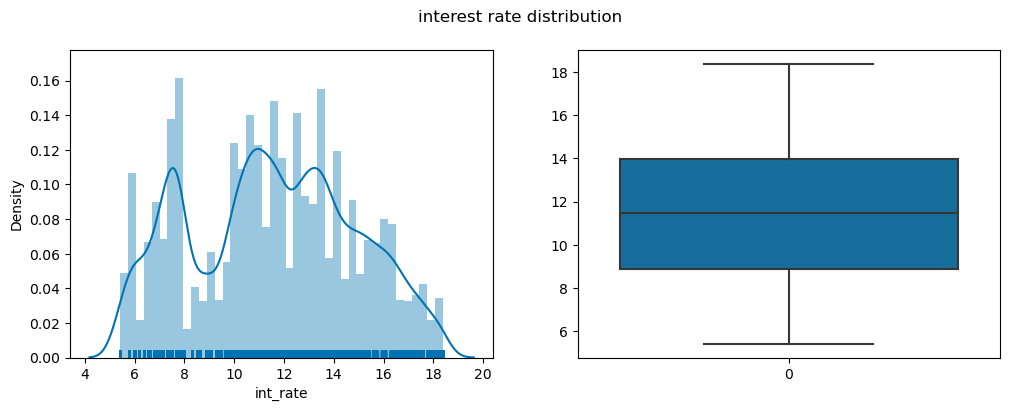

In [97]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

Observation: From the above 2 plots, we can conclude that most of the interest rates lies between 9% to 14.5%. The outliers are already removed from this metrics.

### Installment

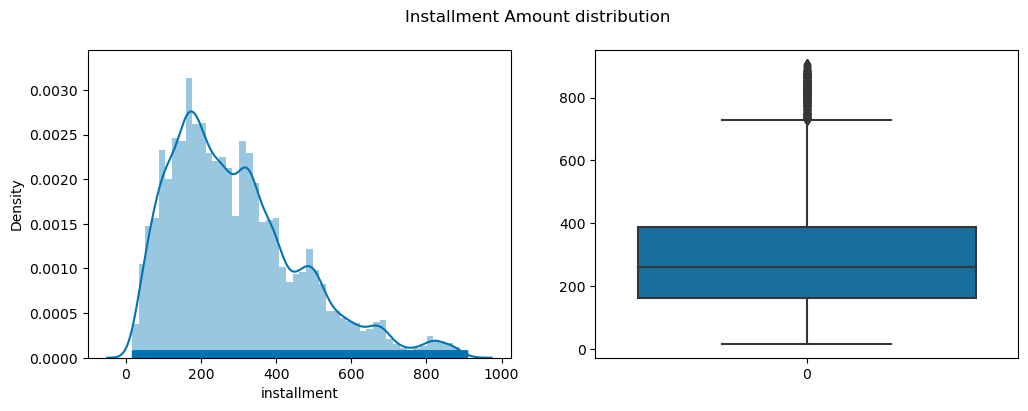

In [98]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

We see some outliers here, however, the average installment lies around 280 as per the above graphs

### Annual Income

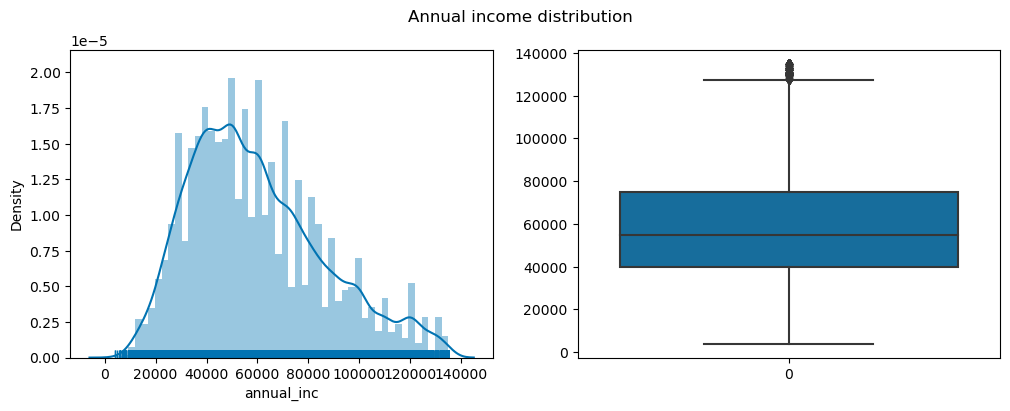

In [99]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

Observation: Most of the outliers are removed already, but still it appears to have few. However, average income lies around 60000

### DTI - Debt to Income Ratio

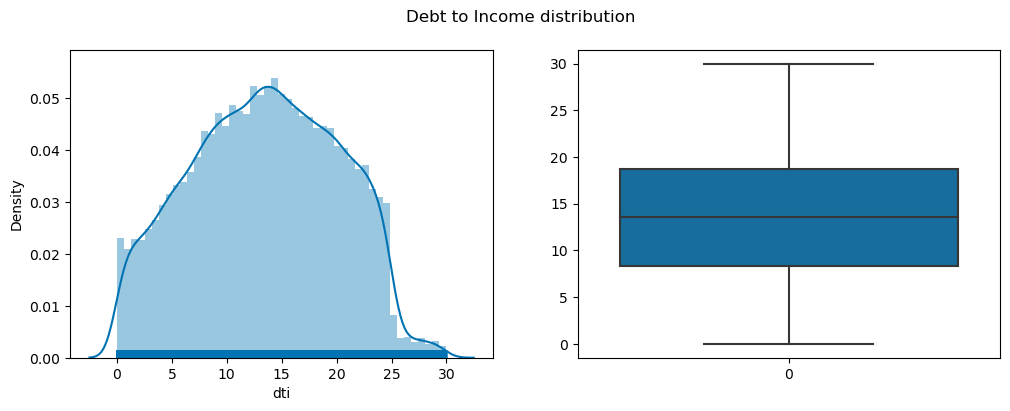

In [100]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

Observation: There are no outliers and the distribution is similar to normal distribution. All the loans are given to borrower's who have Debt to Income ration less than 30. Which shows "Positive Result"

### Pub rec

Text(0.5, 1.0, 'Public Record Distribution')

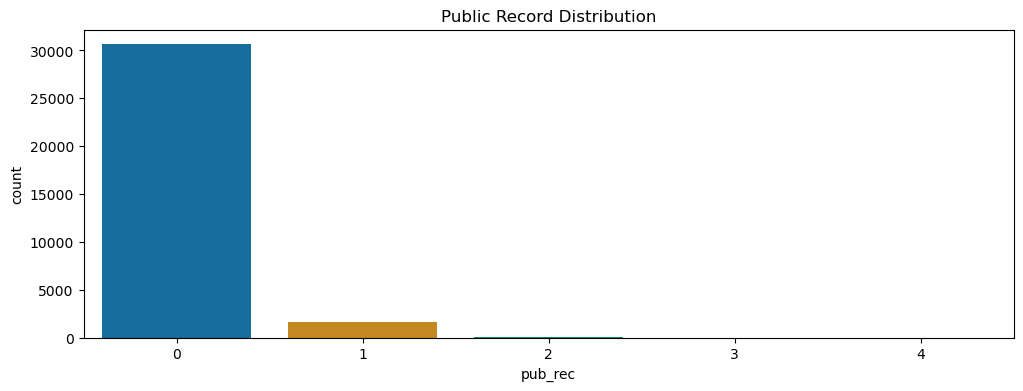

In [103]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'pub_rec', data = data)
plt.title('Public Record'+' Distribution')

Observation: Around 90% borrower's are having no public derogatory records. Again "Positive Sign".

### pub_rec_bankruptcies

Text(0.5, 1.0, 'Public Record bankruptcies Distribution')

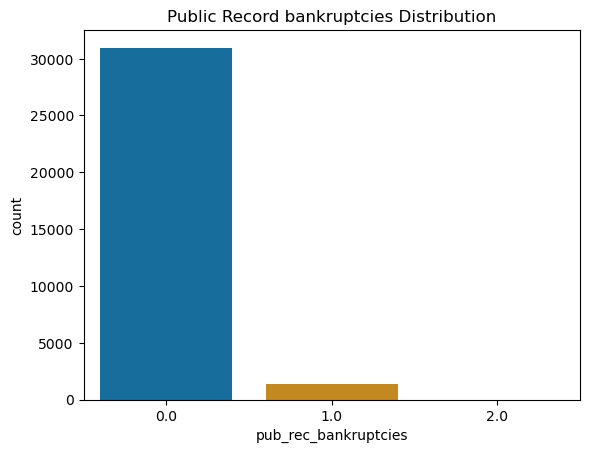

In [105]:
sns.countplot(x = 'pub_rec_bankruptcies', data = data)
plt.title('Public Record bankruptcies'+' Distribution')

Observation: 99% people are clean and have no bankruptcies. Again "Positive sign"

### Loan issue Date: 

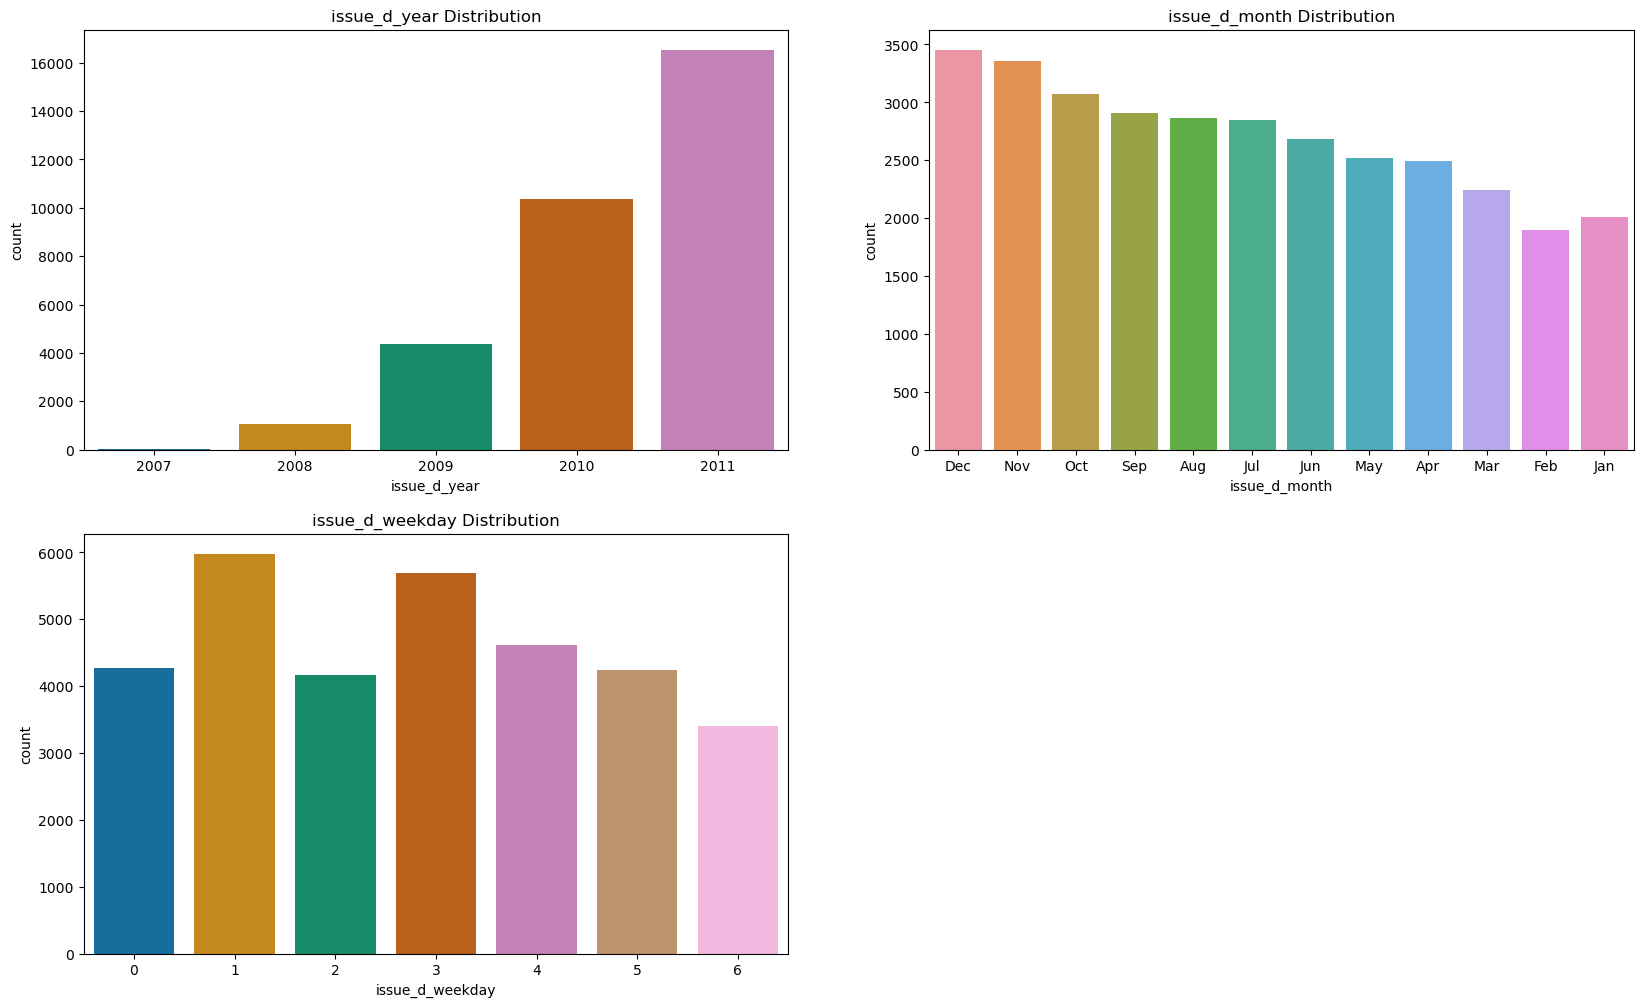

In [109]:
# Issue Year
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(x = 'issue_d_year', data = data)
plt.title('issue_d_year'+' Distribution')

# Issue Month
plt.subplot(2,2,2)
sns.countplot(x = 'issue_d_month', data = data)
plt.title('issue_d_month'+' Distribution')

# Issue Week
plt.subplot(2,2,3)
sns.countplot(x = 'issue_d_weekday', data = data)
plt.title('issue_d_weekday'+' Distribution')

plt.show()

Observations:

Most of the loans were issue in 2011 year and every year, number of loans issued were doubled.

Most of the loans are issued in last quarter of the year (Oct, Nov, Dec), however, maximum loans were issued in December.

Also, most of the loans were issued on 1st and 3rd day of the week.

### Earliest Credit line (earliest_cr_line)

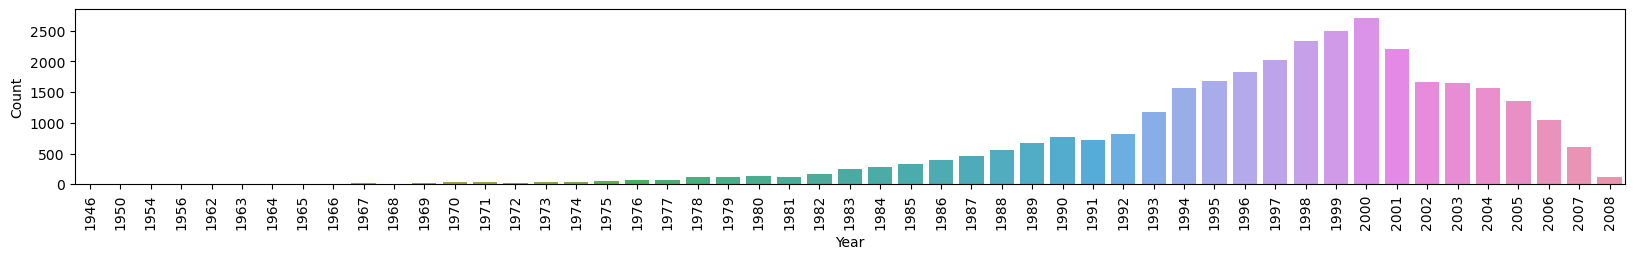

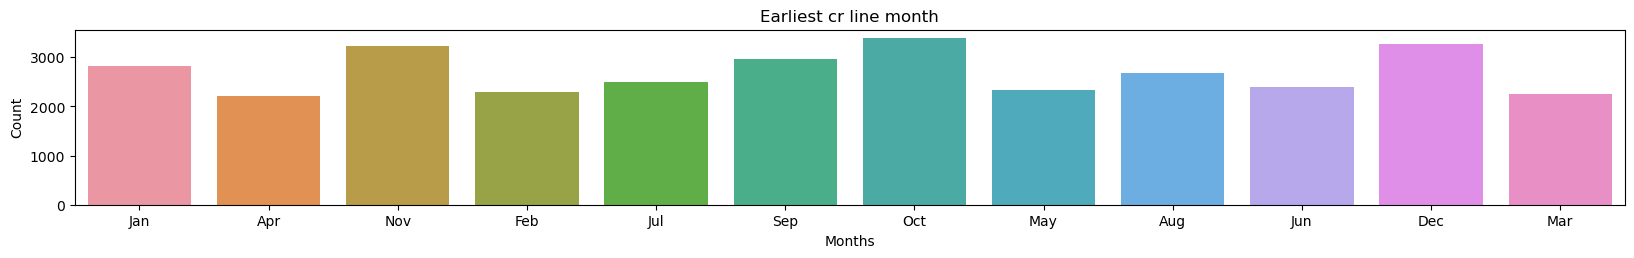

In [114]:
#year
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(x = 'earliest_cr_line_year', data = data)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(x = 'earliest_cr_line_month', data = data)
plt.title('Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

Observation: Earlier credit line of the borrower's is in the last quarter (Oct, Nov, Dec) of the year 2000.

As we are done with unsegmented unvariate analysis, let us now proceed with segmented univariate analysis.

# Segmented Univariate Analysis

### Let us analyze loan amount against term, grades, emp length, home ownership, verification status, loan status, purpose, issued year/month and earliest credit line

### Loan Amount Vs Term
### Loan Amount Vs Grade

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

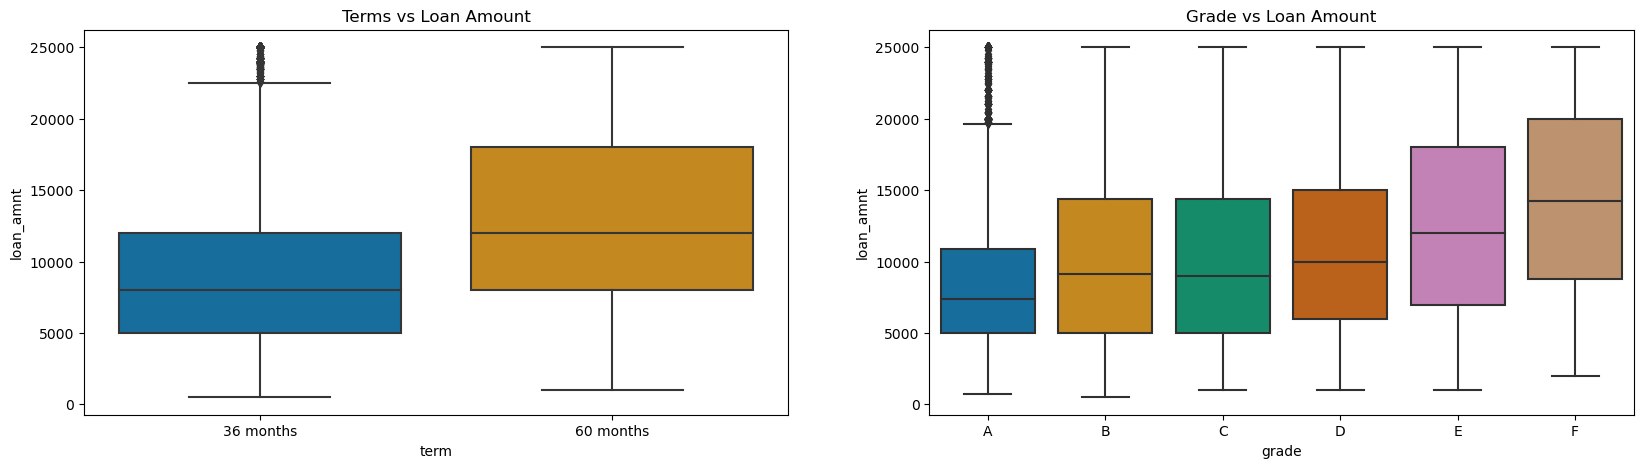

In [125]:
#Term
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')

#Grade
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

Observations: 

Most of the loans have 60 months tenure

As the grades increases loan amount also increases

### Employee length vs Loan Amount
### Home Ownership vs Loan Amount

Text(0.5, 1.0, 'home_ownership vs Loan Amount')

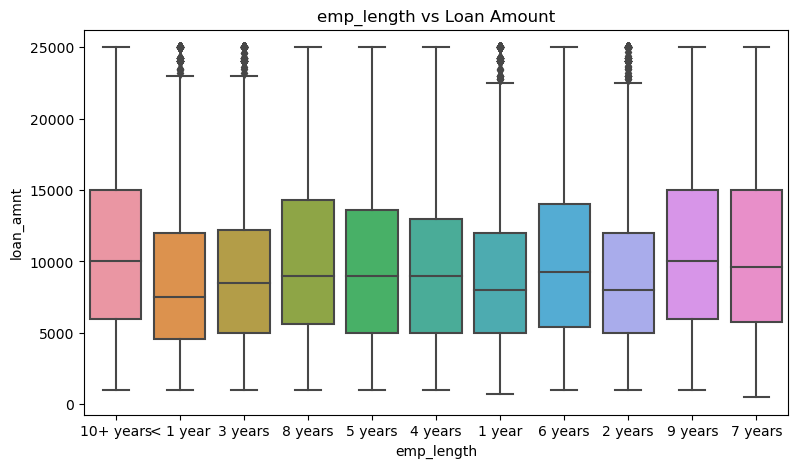

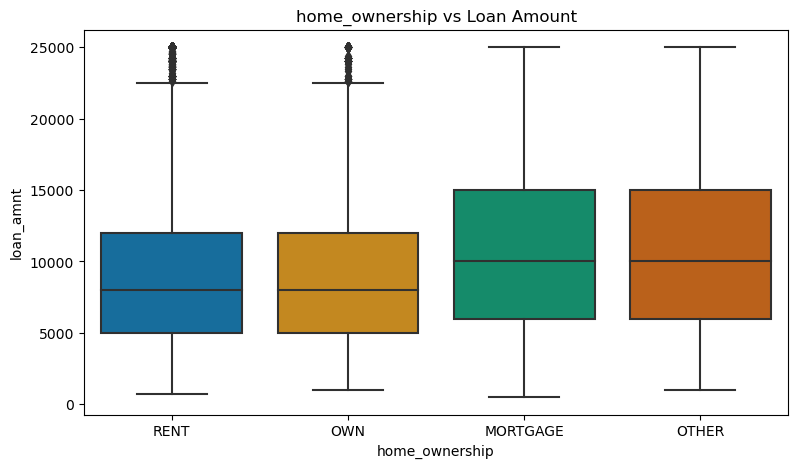

In [127]:
#emp_length

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

#Home ownership

plt.figure(figsize=(20,5))
plt.subplot(122)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')

Observation:

Applicants who have 10+ years of experience (or employee length) have taken more loan compared to the applicants having <1 year.

Applicants who has kept something for mortgage have borrowed more loans.

### Verfication status vs Loan Amount

(array([0, 1, 2]),
 [Text(0, 0, 'Not Verified'),
  Text(1, 0, 'Source Verified'),
  Text(2, 0, 'Verified')])

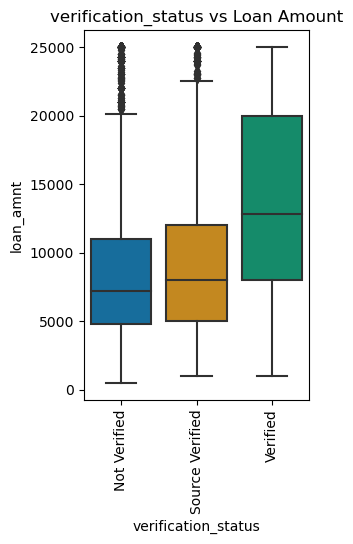

In [128]:
#Verification Status
plt.subplot(121)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)
plt.xticks(rotation=90)

Observation: Surprisingly most of the loan applicants are verified.

### Loan status Vs Loan amount

Text(0.5, 1.0, 'loan_status vs Loan Amount')

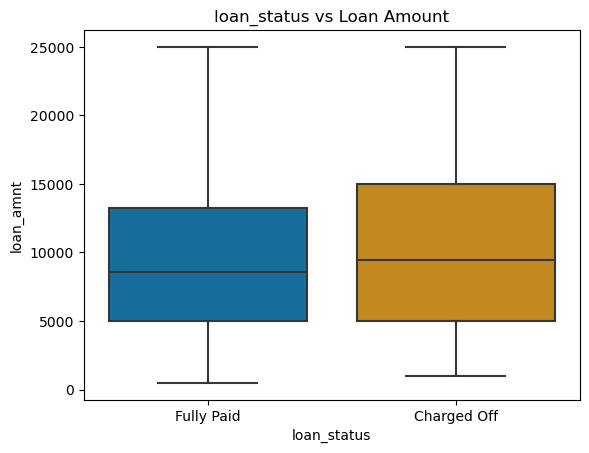

In [129]:
# Loan Status
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

Observation: Charged Off applicants have higher amounts of loan than Fully Paid ones.

### Purpose vs Loan Amount

Text(0.5, 1.0, 'purpose vs Loan Amount')

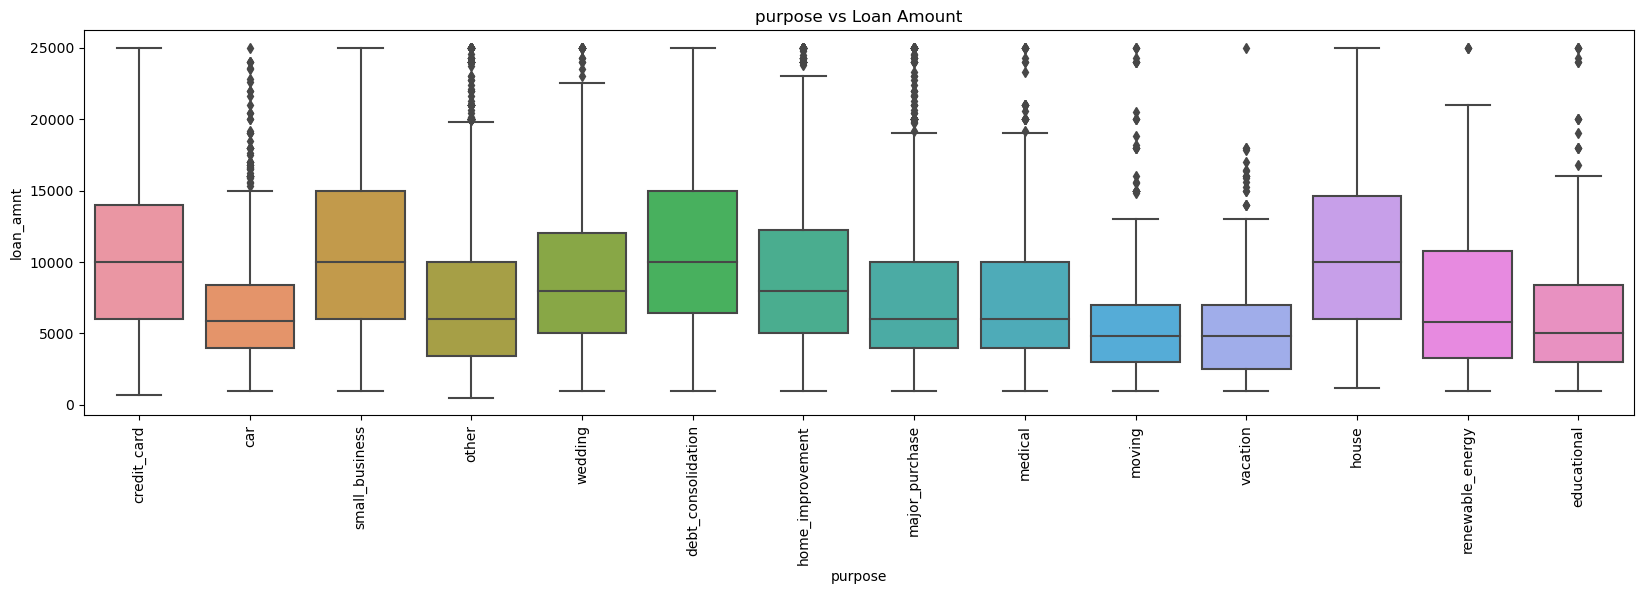

In [130]:
#Purpose

plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

Observation: The main purpose behind loans taken by the applicants were for small businesses or for debt consolidation.

### Issue year/month vs Loan amount

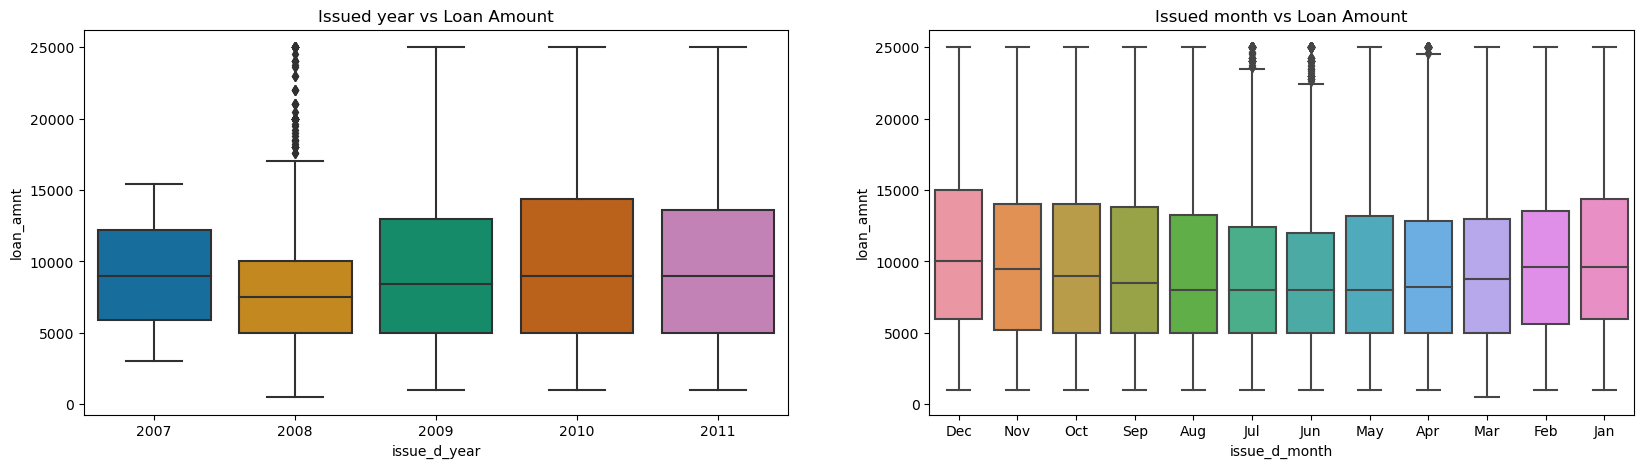

In [131]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

Observation: 

The median loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.

Most of the loan applicants have taken higher loan amount in 2008 which are plotted as ouliers.

Loan borrowers took almost similar amounts in all the months except in December which is higher.

### Earliest credit line vs loan amount

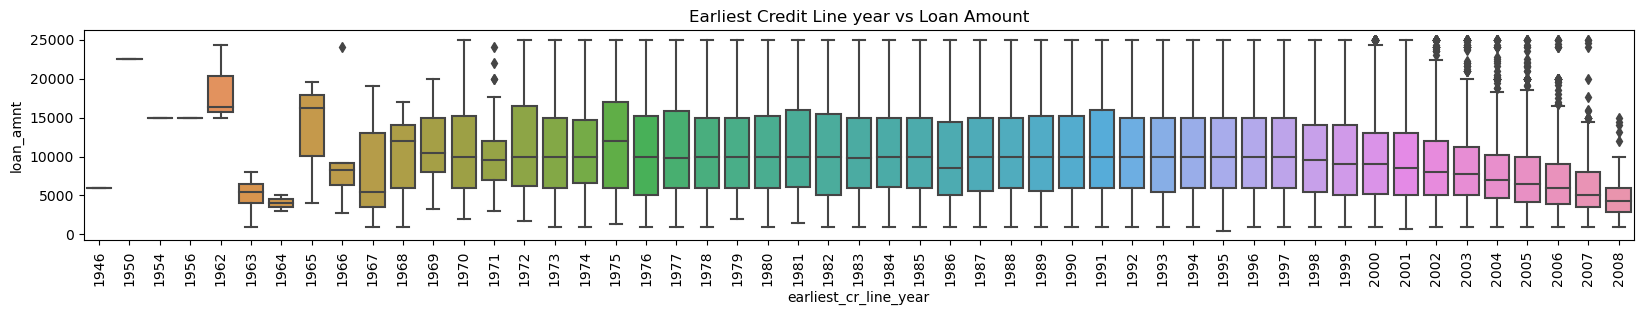

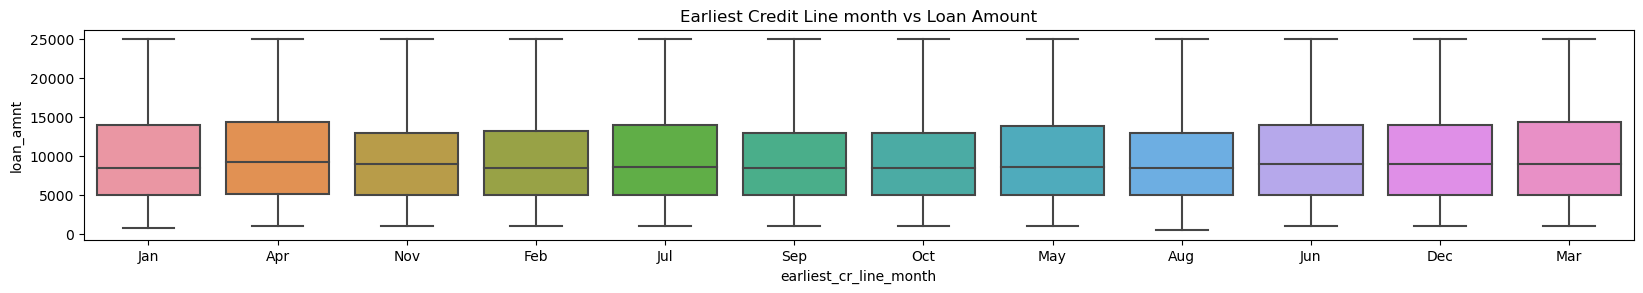

In [132]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

Observation:
Borrowers who go earliest credit line in 1975 got wide spreaded amount of loans than others.

### Let us analyze for few more variables

### Loan Status vs funded amount

Text(0.5, 1.0, 'loan_status vs Funded amnt')

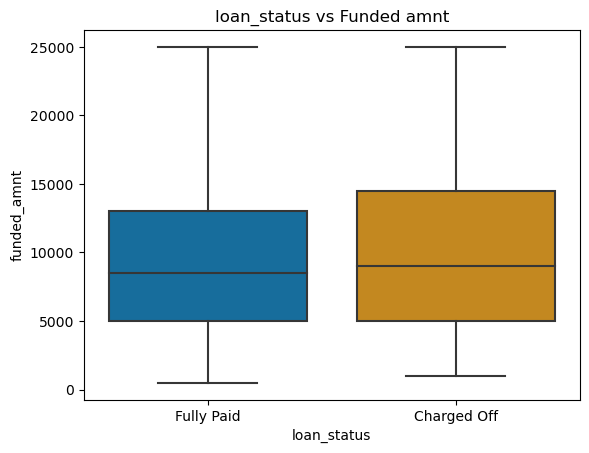

In [133]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Observation: Charged Off applicants are more funded than Fully Paid ones.

### Interest vs term
### Int rate vs grades
### Int rate vs loan status

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

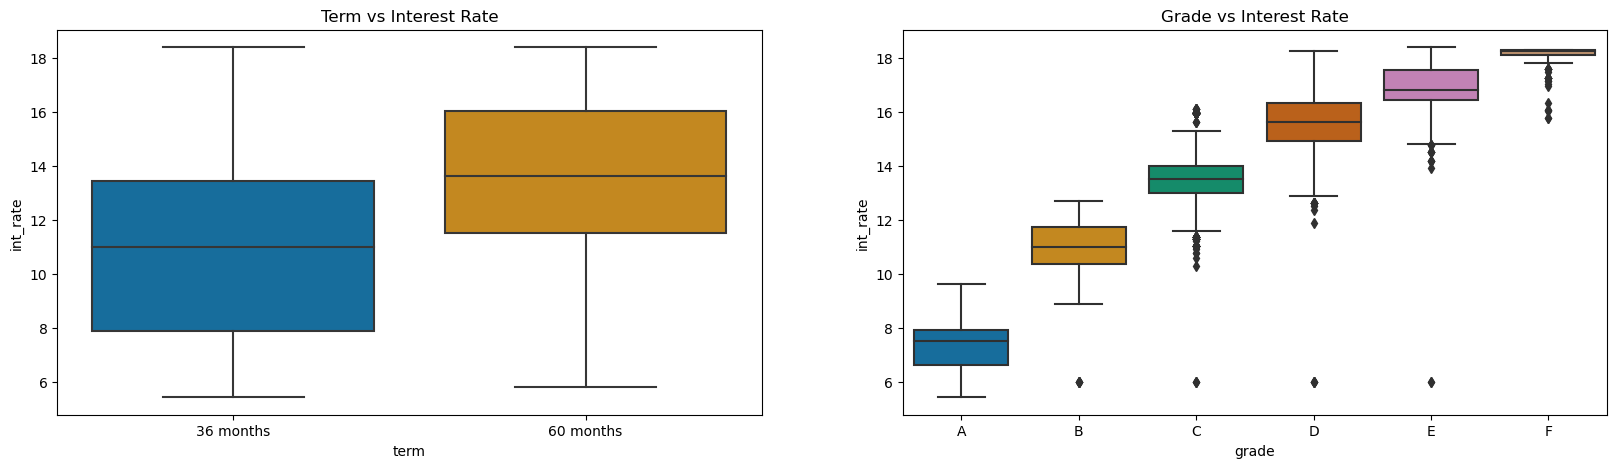

In [134]:
#Int rate vs term

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')

#Int rate vs Grades
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

Observation:
The interest rates are higher for Higher tenure loans.
And Also Interest Rates are Higher as Grades are Lowering (A to G).

Text(0.5, 1.0, 'loan_status vs Interest Rate')

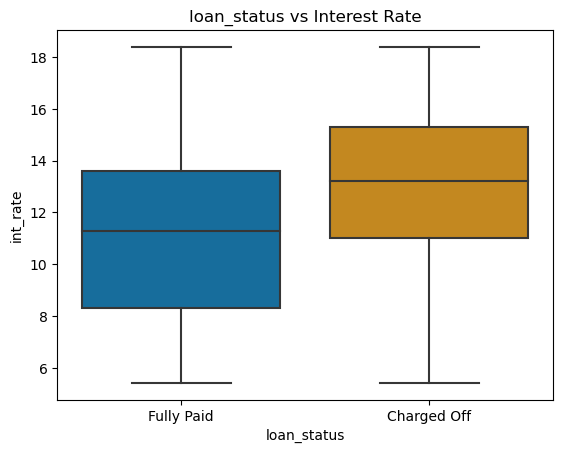

In [136]:
#Loan status and int  rate
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

Observations:
greater the interest rate more the chance of Defaulting the loan.

### Annual Income vs loan status

Text(0.5, 1.0, 'loan_status vs annual income')

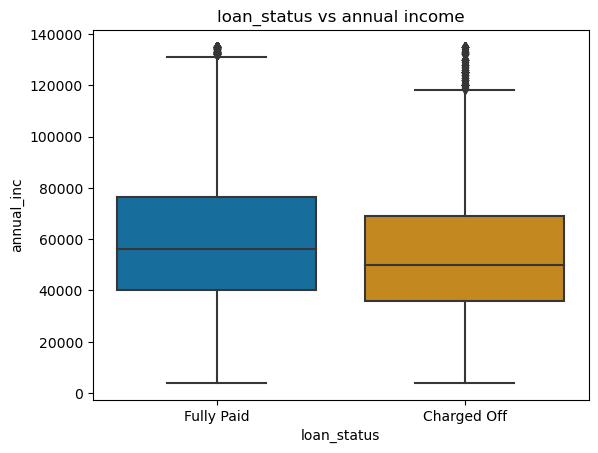

In [139]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')

Applicants who have higher annual income has paid off the loans compared to the charged off applicants

### As we have enough observations from Univariate Analysis, lets proceed to Bivariate Analysis

# Bivariate Analysis 

### Term vs Loan Amount

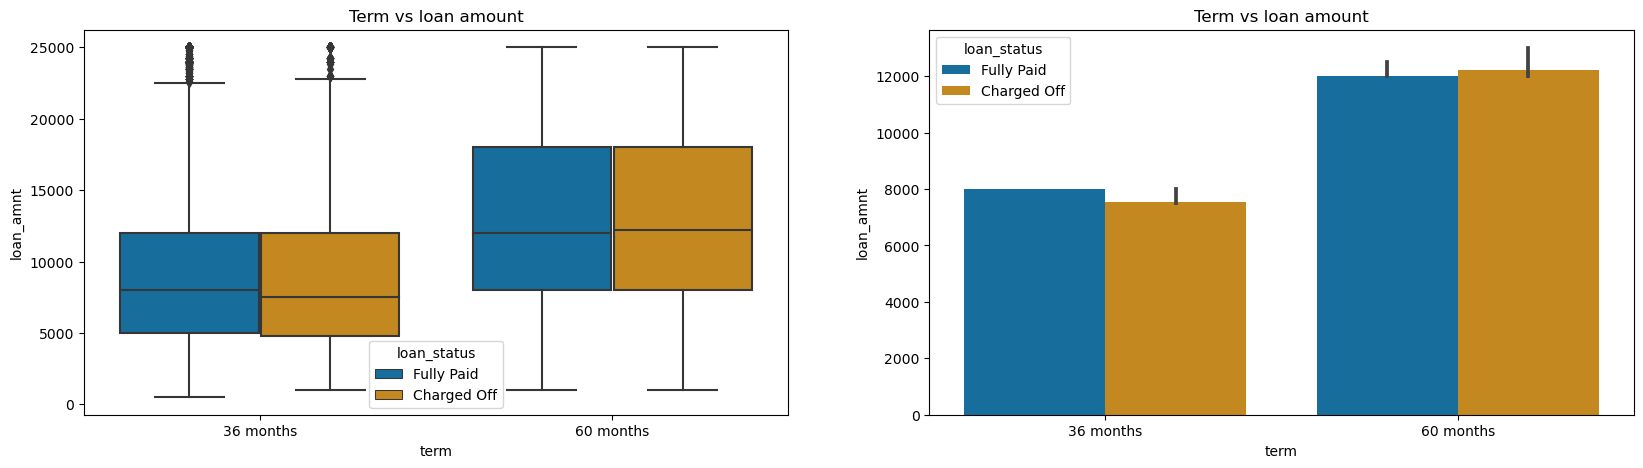

In [145]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

Observation: Loan amount does not serve any significant purpose in analysing w.r.t terms as they both have equal distribution for 36 and 60 months

### Term vs Interest Amount

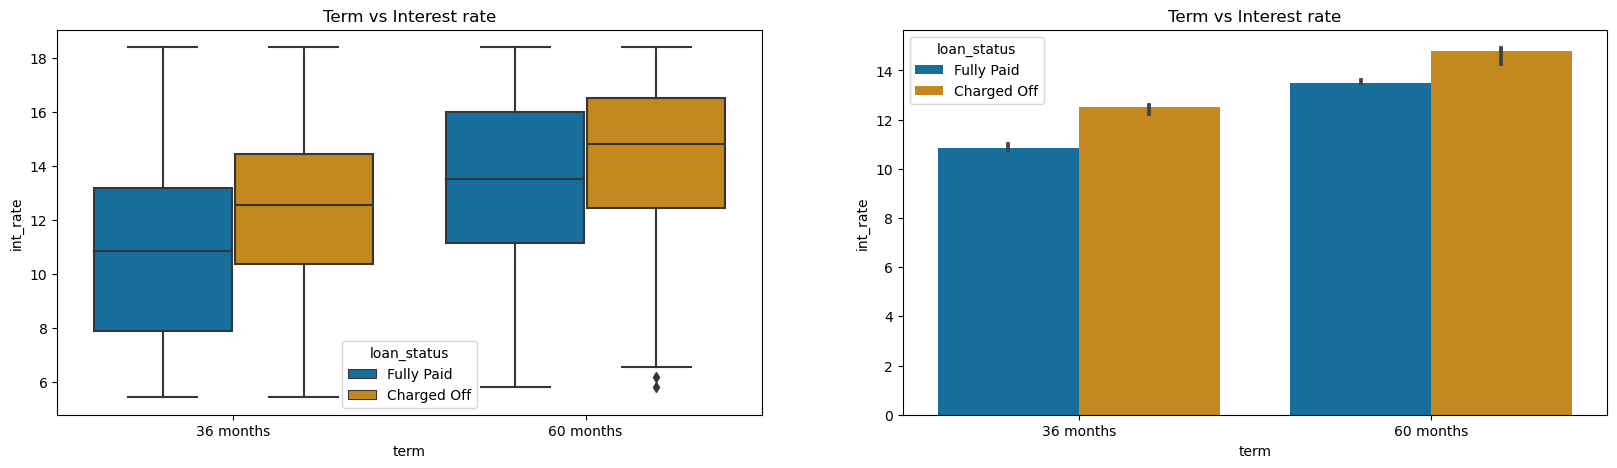

In [146]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

Observation: For higher interest rates the defaulters rate is higher in both 36 and 60 months tenure.

### Grade vs Loan Status

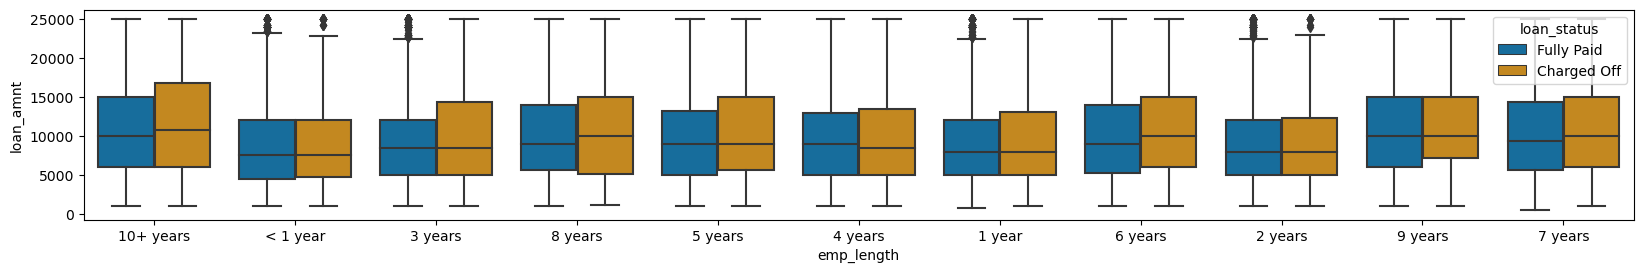

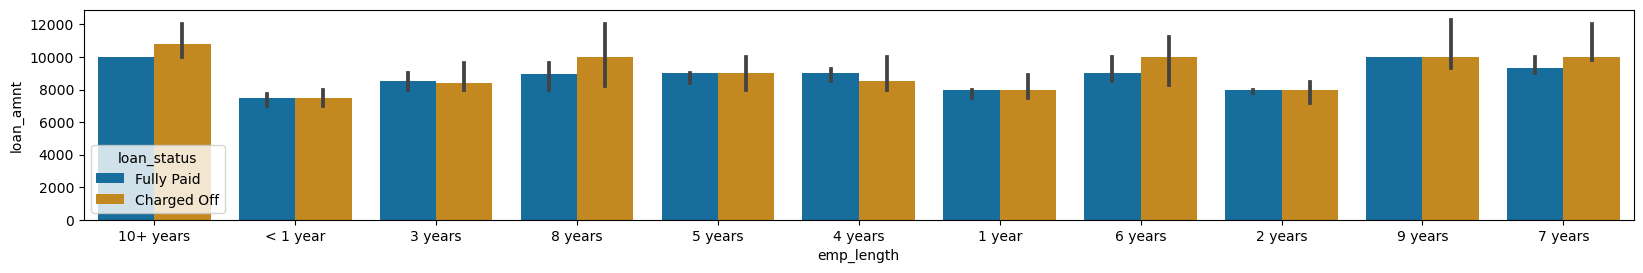

In [150]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

Observation: Borrowers with higher employment length has taken more loan amounts and got more default rate.

### Emp length vs DTI

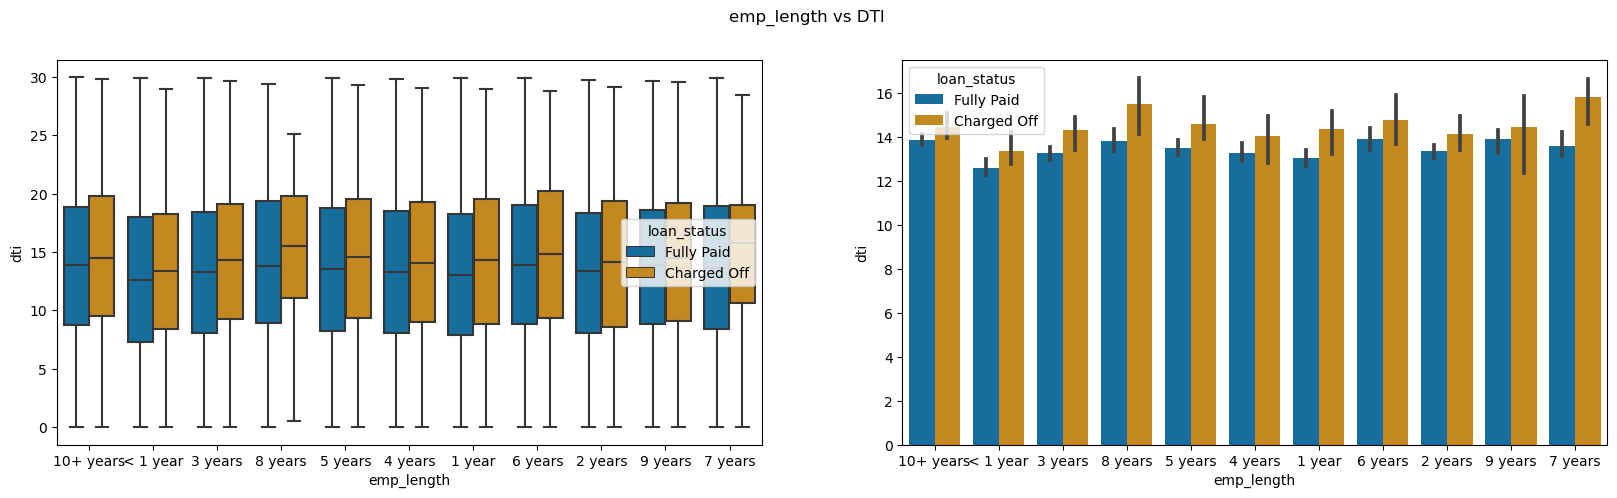

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

Observations:
Employment Length and DTI are not showing any patterns towards defaults.

### Addess state vs loan status

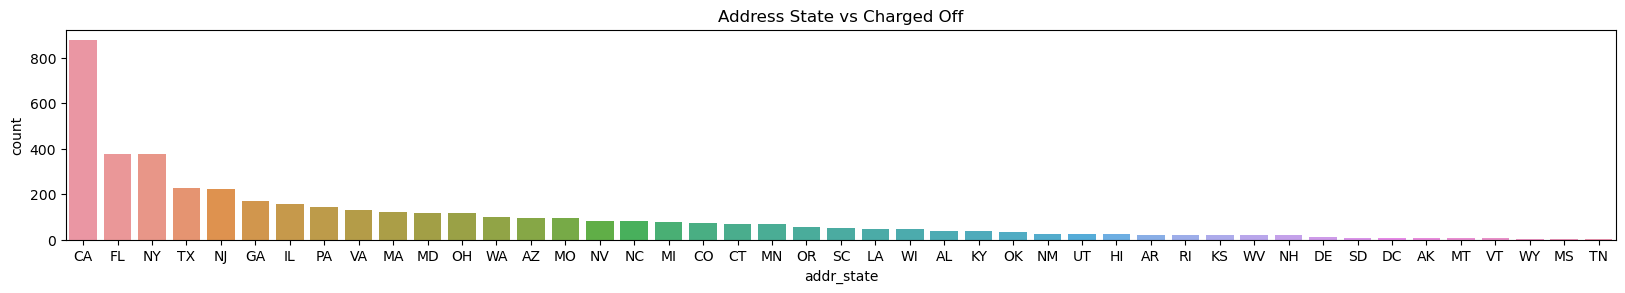

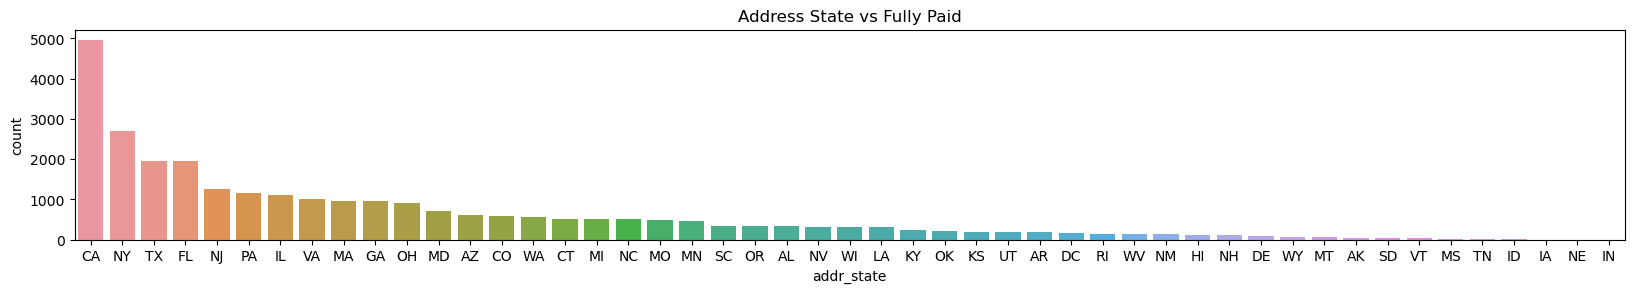

In [178]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

Observations:
More number of borrowers defaulted in CA , FL and NY states.

### Final Observations

Lending club company should reduce the high interest loans for 60 months tenure, they are prone to loan default.

Grades are good metric for detecting defaulters. Lending club should examine more information from borrowers before issuing loans to Low grade (G to A).

Lending Club should control their number of loan issues to borrowers who are from CA, FL and NY to make profits.

Small business loans are defaulted more. Lending club should stop/reduce issuing the loans to them.

Borrowers with mortgage home ownership are taking higher loans and defaulting the approved loans. Lending club should stop giving loans to this category when loan amount requested is more than 12000.

When employment length is 10yrs and loan amount is 12k-14k, defaulters are expected more.